# VA Check

For households with at most three adults (drivers).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

## define

In [2]:
va_order = ['zv', 'iv', 'sv']
mpos = ['BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', 'MVC',
       'MVPC', 'NMCOG', 'NPEDC', 'OCPC', 'PVPC', 'SRPEDD']

In [3]:
def va_comp(csv_1, csv_2, mpo=None):
    df1 = pd.read_csv(csv_1)
    df1 = df1.rename(columns={'num_households':'tdm19'})
    df2 = pd.read_csv(csv_2)
    df2 = df2.rename(columns={'va_ac3':'va','num_households':'rep23'})

    if mpo == None:
        df = df1.copy()
    else:
        df = df1[df1['mpo']==mpo].copy()

    df = df.merge(df2, on = ['mpo','va'])
    df['va'] = pd.Categorical(df['va'], categories=va_order, ordered=True)

    # Grouping by 'va' and calculating the sum for 'tdm19' and 'rep23'
    grouped_sum = df.groupby('va').sum().reset_index()

    # Calculating percentages
    total_tdm19 = grouped_sum['tdm19'].sum()
    total_rep23 = grouped_sum['rep23'].sum()

    grouped_sum['tdm19_perc'] = grouped_sum['tdm19'] / total_tdm19 * 100
    grouped_sum['rep23_perc'] = grouped_sum['rep23'] / total_rep23 * 100

    print(grouped_sum)

    # Plotting
    fig, ax = plt.subplots(figsize=(16, 8))
    bar_width = 0.35
    index = range(len(grouped_sum))

    bar1 = ax.bar(index, grouped_sum['tdm19_perc'], bar_width, label='TDM23 2019')
    bar2 = ax.bar([p + bar_width for p in index], grouped_sum['rep23_perc'], bar_width, label='Replica 2023')

    ax.set_xlabel('Vehicle Availability')
    ax.set_ylabel('Percentage')
    if mpo == None:
        title = 'Percentage of Households by Vehicle Availability and Year (All RPAs)'
    else:
        title = 'Percentage of Households by Vehicle Availability and Year ('+mpo+')'
    ax.set_title(title)
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(grouped_sum['va'])
    ax.legend()

    plt.show()


## inputs

In [4]:
csv_1 = r'.\data\va_dc3_tdm2019_v0816.csv'
csv_2 = r'.\data\va_ac3_mpo_rep23_v0816.csv'


## draw

   va    tdm19    rep23  tdm19_perc  rep23_perc
0  zv   174726   315935    6.892708   12.394327
1  iv   386198   469088   15.234996   18.402615
2  sv  1974016  1764006   77.872297   69.203057


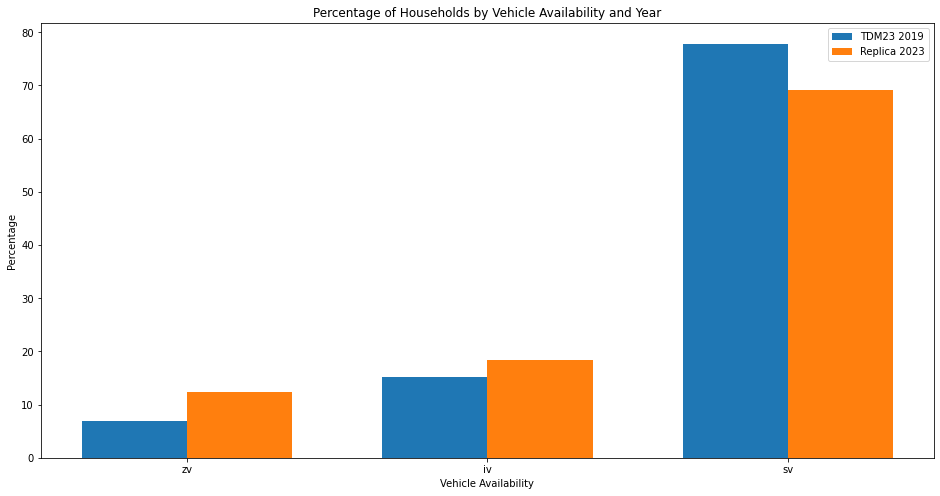

In [6]:
va_comp(csv_1, csv_2)

In [7]:
@interact
def va_comp_each_rpa(mpo = mpos):
    va_comp(csv_1, csv_2, mpo)

interactive(children=(Dropdown(description='mpo', options=('BRMPO', 'BRPC', 'CCC', 'CMRPC', 'FRCOG', 'MRPC', '…

BRMPO
   va   tdm19   rep23  tdm19_perc  rep23_perc
0  zv  103250  197901    8.505188   16.169135
1  iv  220152  263133   18.134954   21.498795
2  sv  890563  762909   73.359858   62.332069


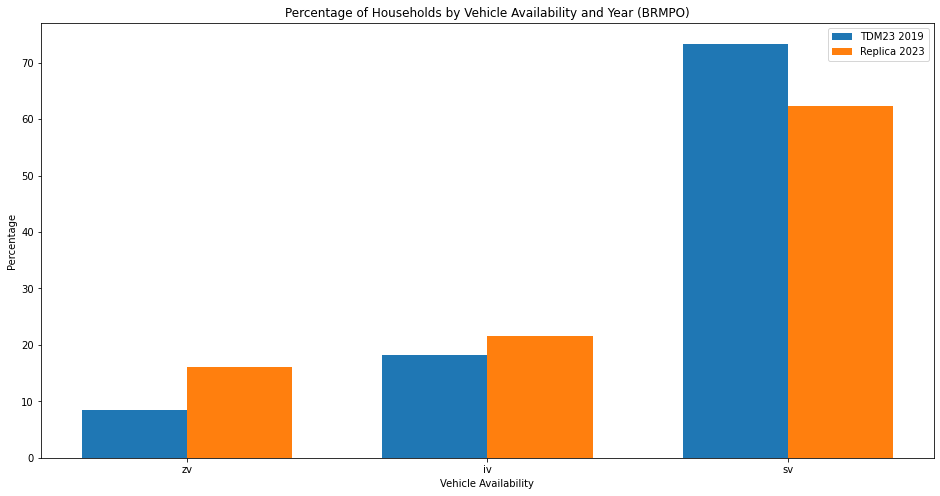

BRPC
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv   2315   5051    4.199775    9.366366
1  iv   5447   8484    9.881717   15.732379
2  sv  47360  40392   85.918508   74.901255


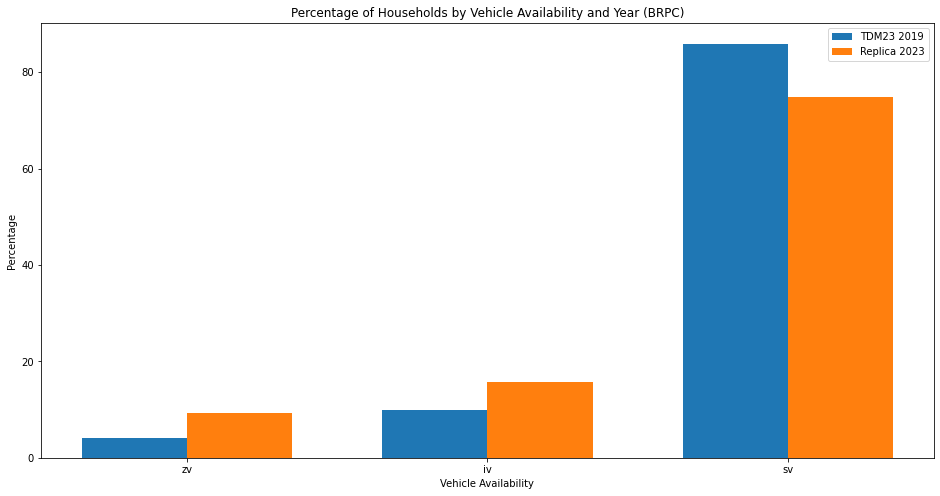

CCC
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv   3178   4754    3.276728    4.969632
1  iv  10192  11526   10.508625   12.048797
2  sv  83617  79381   86.214647   82.981570


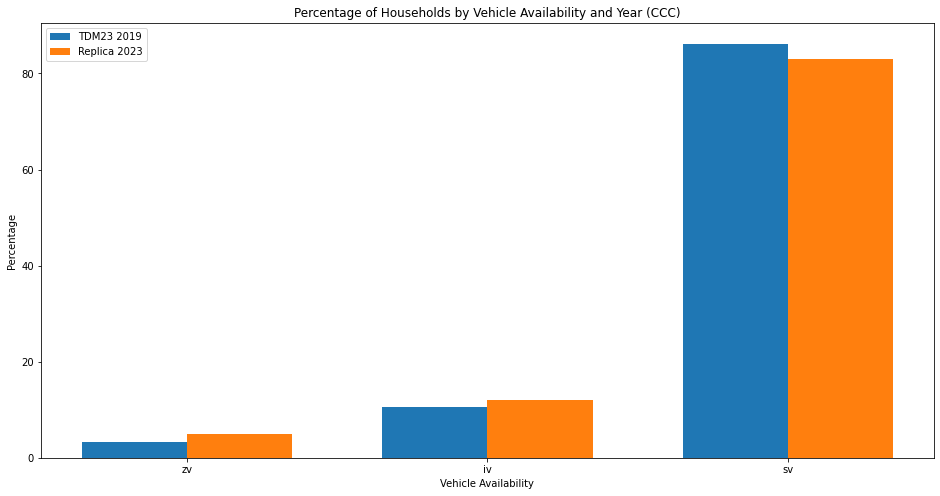

CMRPC
   va   tdm19   rep23  tdm19_perc  rep23_perc
0  zv   12573   20504    5.871804    9.604377
1  iv   28656   33403   13.382837   15.646459
2  sv  172896  159579   80.745359   74.749164


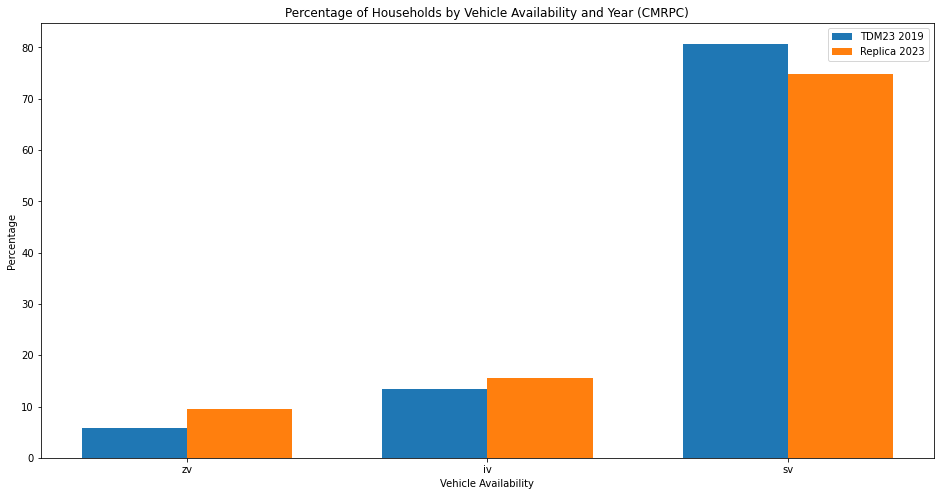

FRCOG
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv   1069   2212    3.603209    7.509506
1  iv   3052   3856   10.287178   13.090712
2  sv  25547  23388   86.109613   79.399783


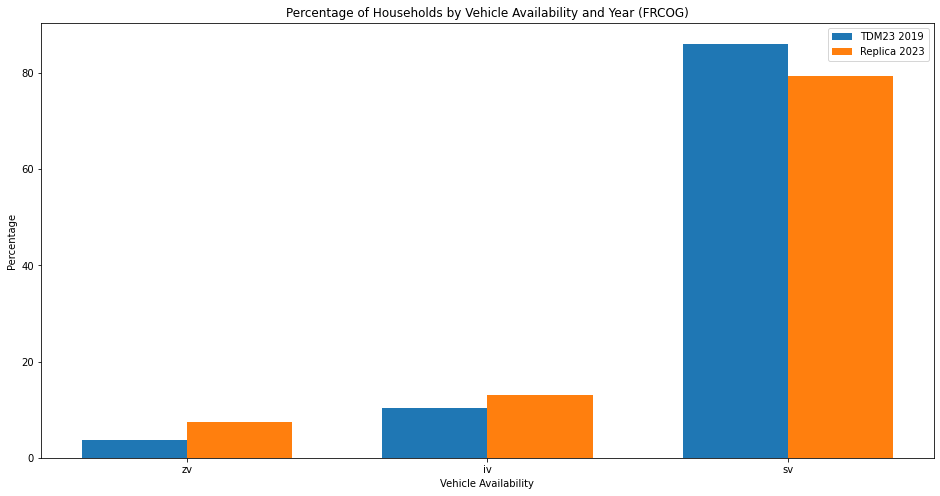

MRPC
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv   3580   6582    3.975304    7.122066
1  iv  10154  13871   11.275207   15.009143
2  sv  76322  71964   84.749489   77.868790


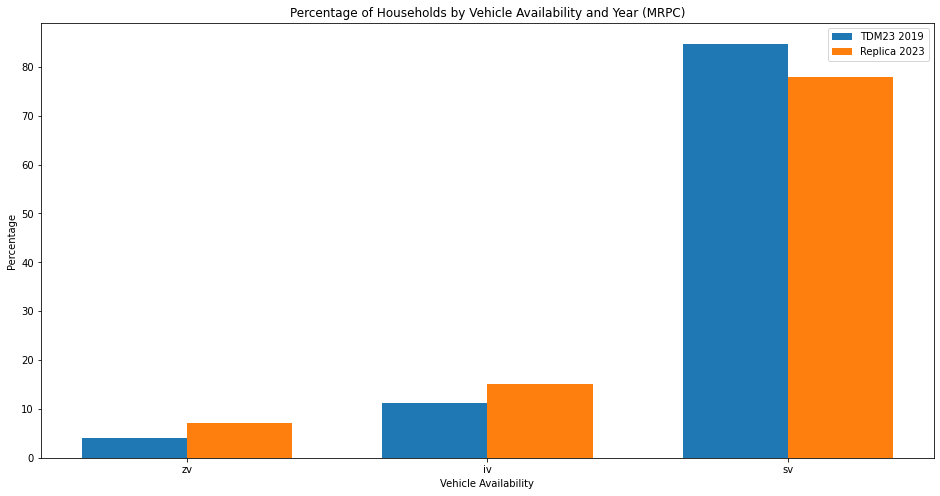

MVC
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv    246    334    2.987975    5.062140
1  iv    814    880    9.887040   13.337375
2  sv   7173   5384   87.124985   81.600485


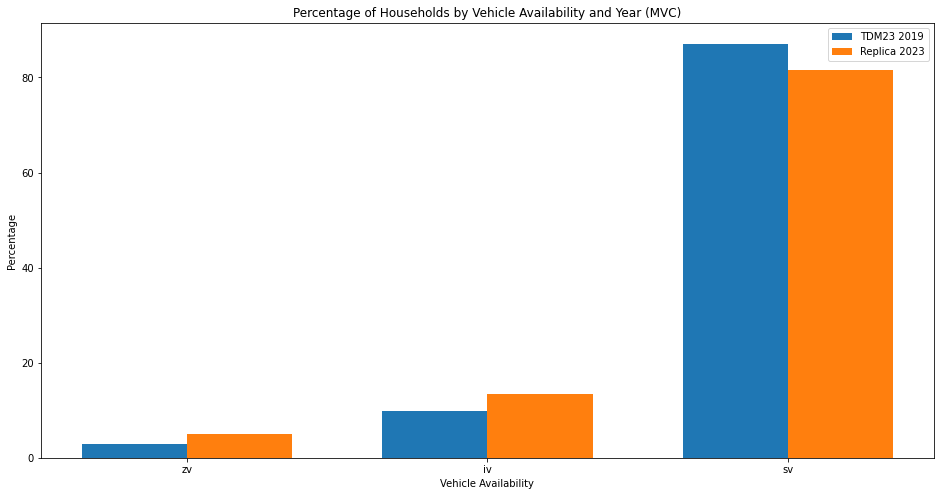

MVPC
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv   6897  11219    5.611058    8.918195
1  iv  17585  21277   14.306285   16.913489
2  sv  98436  93303   80.082657   74.168316


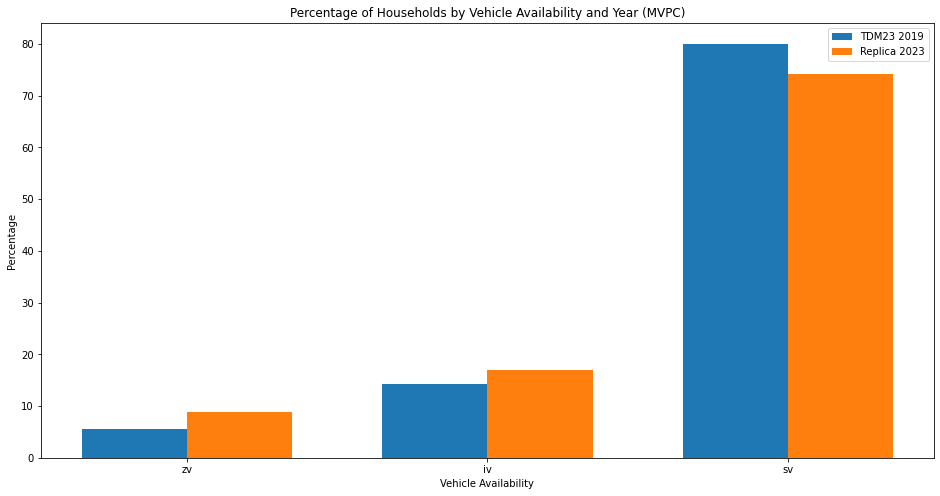

NMCOG
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv   5196   8251    5.166242    8.047950
1  iv  14213  17220   14.131602   16.796231
2  sv  81167  77052   80.702156   75.155819


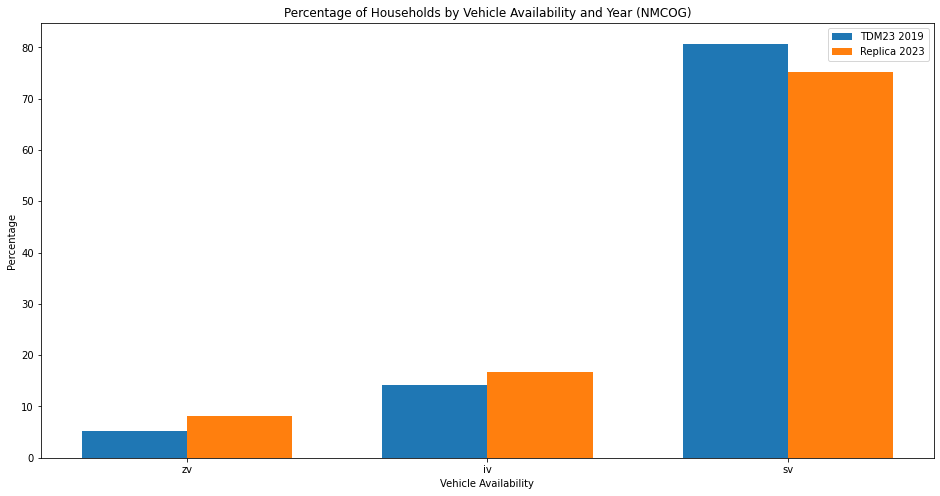

NPEDC
   va  tdm19  rep23  tdm19_perc  rep23_perc
0  zv    126    201    2.629382    4.700655
1  iv    501    649   10.454925   15.177736
2  sv   4165   3426   86.915693   80.121609


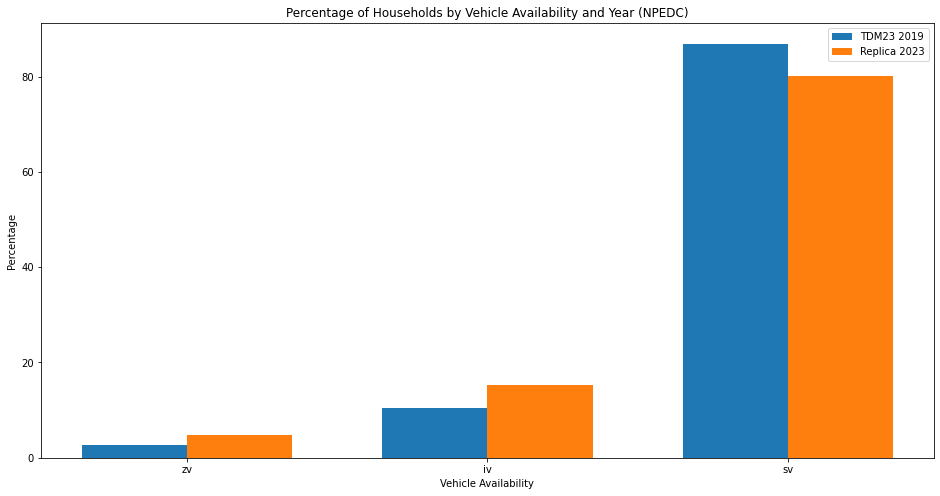

OCPC
   va   tdm19  rep23  tdm19_perc  rep23_perc
0  zv    5131   9935    4.026019    7.658922
1  iv   15874  19797   12.455471   15.261567
2  sv  106441  99986   83.518510   77.079511


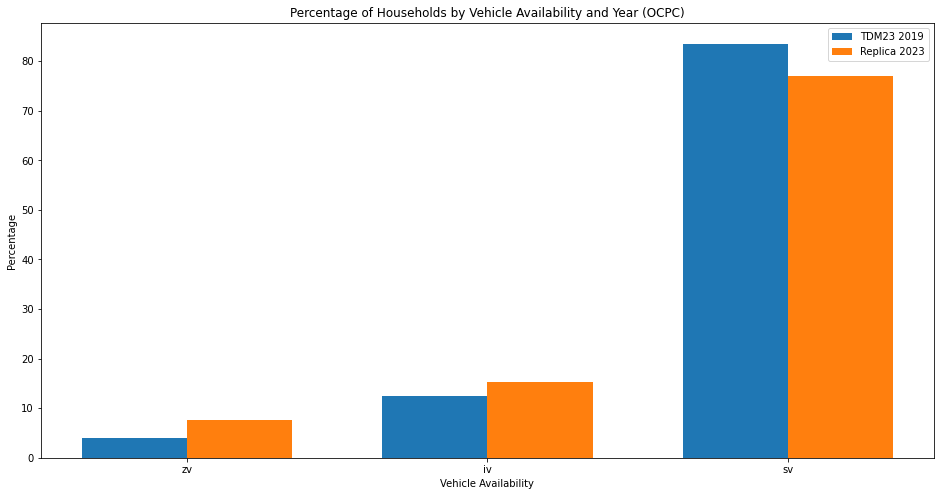

PVPC
   va   tdm19   rep23  tdm19_perc  rep23_perc
0  zv   16538   25733    7.215406   11.235106
1  iv   28577   37369   12.467932   16.315420
2  sv  184089  165939   80.316661   72.449474


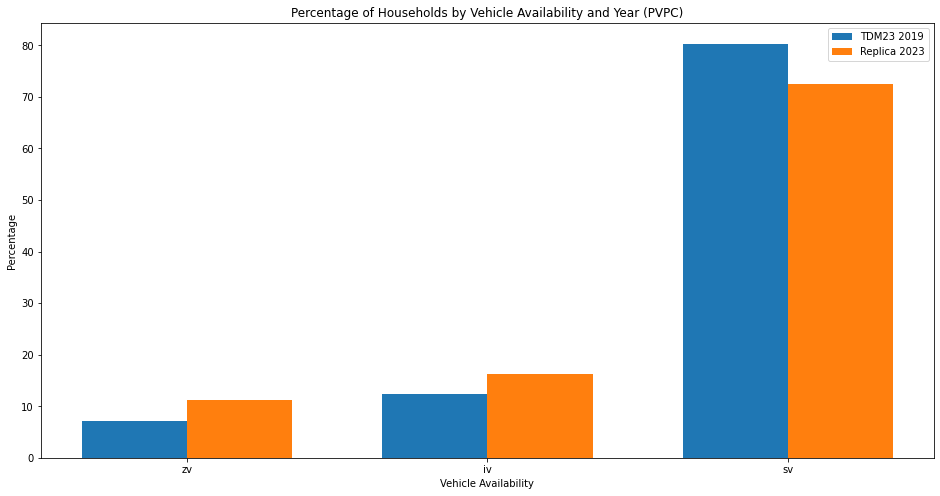

SRPEDD
   va   tdm19   rep23  tdm19_perc  rep23_perc
0  zv   14627   23258    6.048014    9.603442
1  iv   30981   37623   12.810112   15.534883
2  sv  196240  181303   81.141874   74.861675


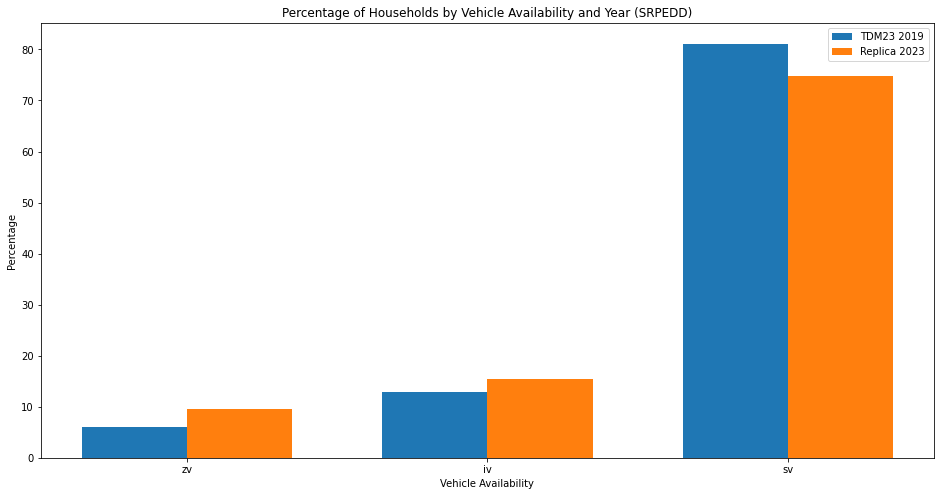

In [8]:
for mpo in mpos:
    print(mpo)
    va_comp(csv_1, csv_2, mpo)

# end